In [1]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the dataset
import os
import zipfile
local_zip = '/content/drive/MyDrive/Chess_Image.zip'
local_dir = '/tmp/chess Image/Chessman-image-dataset/Chess'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/chess Image')
zip_ref.close()

In [3]:
# Checking the number of classes and class names
os.listdir('/tmp/chess Image/Chessman-image-dataset/Chess')

['Bishop', 'Knight', 'Pawn', 'Queen', 'Rook', 'King']

In [4]:
# Importing all required libraries
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *

In [ ]:
# Image pre-processing 
image_size = (224,224)
batch = 16
# Training dataset splitting
train = keras.preprocessing.image_dataset_from_directory(
    local_dir,
    validation_split=.2,
    subset='training',
    seed=2022,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 552 files belonging to 6 classes.
Using 442 files for training.


In [ ]:
# Validation dataset splitting
validation = keras.preprocessing.image_dataset_from_directory(
    local_dir,
    validation_split=.2,
    subset='validation',
    seed=2022,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [ ]:
# Function to display sample
def display_samples(dataset, n_samples, classes_name):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(n_samples):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(classes_name[np.argmax(labels[i])])
            plt.axis("off")

(224, 224, 3)


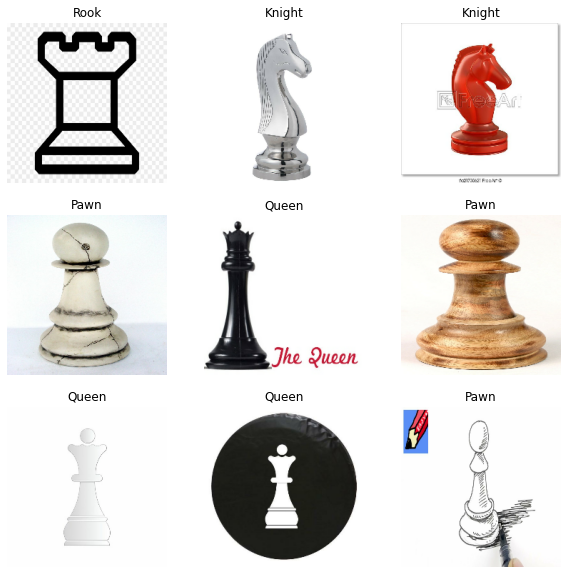

In [ ]:
# Train dataset Sample Display
display_samples(train, 9, train.class_names)
for images, labels in train.take(1):
        for i in range(1):
            print(images[i].shape)

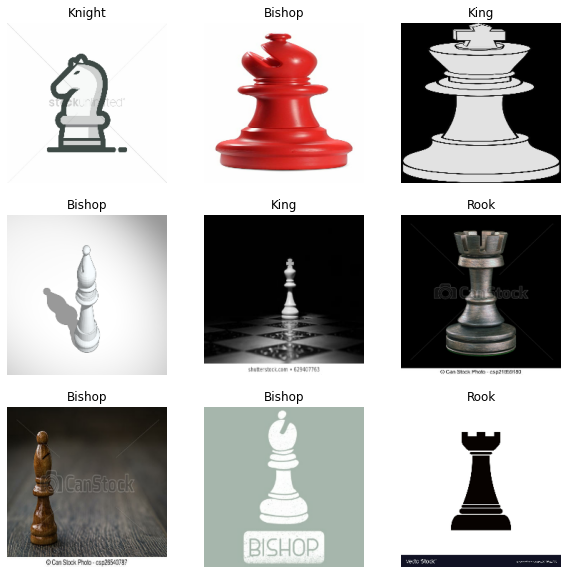

In [ ]:
# Validation Dataset Sample Display
display_samples(validation, 9, validation.class_names)

In [ ]:
# Creating object for class names
class_names = train.class_names
labels = np.array([])
for _, label in train:
    labels = np.concatenate((labels, np.argmax(label, axis=-1)))
_, counts = np.unique(labels, return_counts=True)
'''print(labels)'''

'print(labels)'

In [ ]:
total = counts.sum()
print("Class Distribution")
for i in range(len(counts)):
    print(f'{class_names[i]}: {counts[i]}({(counts[i] / total)*100:.2f}%)')

Class Distribution
Bishop: 69(15.61%)
King: 57(12.90%)
Knight: 84(19.00%)
Pawn: 91(20.59%)
Queen: 64(14.48%)
Rook: 77(17.42%)


# xception


In [ ]:
from tensorflow.keras.applications import Xception
xception = Xception(weights='imagenet', include_top=False, input_shape=(224,224,3))
xception.trainable = False

83697664/83683744 [==============================] - 0s 0us/step


In [ ]:
aug = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom((-0.1,0.1)),
    RandomContrast(0.05),  
    RandomTranslation(0.1,0.1)
])

In [ ]:
# Model Creation
input_shape = (image_size[0], image_size[1], 3)
reg = keras.regularizers.l2(0.01)

model1 = keras.Sequential()
model1.add(InputLayer(input_shape))
model1.add(aug)
model1.add(Rescaling(scale=1./255))#normalization
model1.add(xception)
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(len(train.class_names), activation='softmax'))


model1.summary()


model1.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                      

In [ ]:
# Model Optimization
model1.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [ ]:

epochs = 40
model1.fit(
    train,
    epochs=epochs,
    validation_data=validation
);

Epoch 1/40
28/28 [==============================] - 22s 222ms/step - loss: 1.8959 - accuracy: 0.4163 - val_loss: 4.1123 - val_accuracy: 0.4182
Epoch 2/40
28/28 [==============================] - 5s 147ms/step - loss: 1.0226 - accuracy: 0.6109 - val_loss: 1.5499 - val_accuracy: 0.6091
Epoch 3/40
28/28 [==============================] - 5s 144ms/step - loss: 0.7773 - accuracy: 0.7127 - val_loss: 0.8952 - val_accuracy: 0.7364
Epoch 4/40
28/28 [==============================] - 5s 146ms/step - loss: 0.6810 - accuracy: 0.7557 - val_loss: 0.8502 - val_accuracy: 0.6727
Epoch 5/40
28/28 [==============================] - 5s 145ms/step - loss: 0.5783 - accuracy: 0.7941 - val_loss: 0.8647 - val_accuracy: 0.6818
Epoch 6/40
28/28 [==============================] - 6s 185ms/step - loss: 0.4955 - accuracy: 0.8122 - val_loss: 0.9544 - val_accuracy: 0.6455
Epoch 7/40
28/28 [==============================] - 5s 145ms/step - loss: 0.4445 - accuracy: 0.8439 - val_loss: 0.8717 - val_accuracy: 0.6818
Epoch

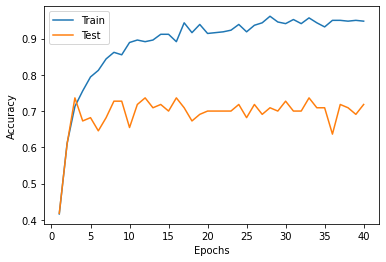

In [ ]:
# Accuracy Plot
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model1.history.history['accuracy'],  label='Train')
plt.plot(epochs_range, model1.history.history['val_accuracy'], label='Test')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()

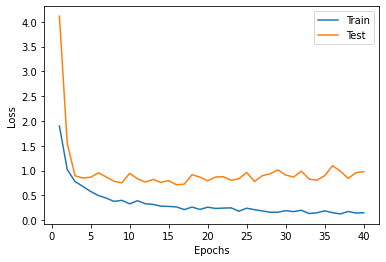

In [ ]:
# Loss Plot
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model1.history.history['loss'],  label='Train')
plt.plot(epochs_range, model1.history.history['val_loss'], label='Test')

plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend()

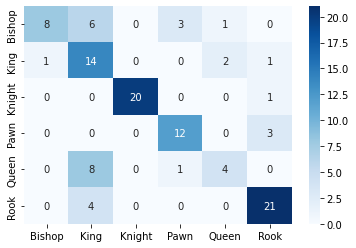

In [ ]:
# Confusion Matrix
y_pred = np.argmax(model1.predict(validation), axis=-1)

predictions = np.array([])
labels =  np.array([])
for x, y in validation:
    predictions = np.concatenate([predictions, np.argmax(model1.predict(x), axis=-1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

conf = tf.math.confusion_matrix(labels=labels, predictions=predictions)
sns.heatmap(conf, annot=True, cmap='Blues', yticklabels=class_names, xticklabels=class_names)

# VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16 
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# Model Creation
input_shape = (image_size[0], image_size[1], 3)
reg = keras.regularizers.l2(0.01)

model2 = keras.Sequential()
model2.add(InputLayer(input_shape))
model2.add(aug)
model2.add(Rescaling(scale=1./255))#normalization
model2.add(vgg)
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(len(train.class_names), activation='softmax'))


model2.summary()

# Model Optimization
model2.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                      

In [ ]:
epochs = 40
model2.fit(
    train,
    epochs=epochs,
    validation_data=validation
)

Epoch 1/40
28/28 [==============================] - 11s 266ms/step - loss: 1.4255 - accuracy: 0.5181 - val_loss: 1.9334 - val_accuracy: 0.4818
Epoch 2/40
28/28 [==============================] - 6s 204ms/step - loss: 0.7827 - accuracy: 0.7149 - val_loss: 1.4368 - val_accuracy: 0.5727
Epoch 3/40
28/28 [==============================] - 5s 159ms/step - loss: 0.6564 - accuracy: 0.7896 - val_loss: 0.8031 - val_accuracy: 0.7818
Epoch 4/40
28/28 [==============================] - 5s 160ms/step - loss: 0.5587 - accuracy: 0.8167 - val_loss: 0.7019 - val_accuracy: 0.7727
Epoch 5/40
28/28 [==============================] - 5s 159ms/step - loss: 0.4708 - accuracy: 0.8484 - val_loss: 0.7286 - val_accuracy: 0.7818
Epoch 6/40
28/28 [==============================] - 5s 159ms/step - loss: 0.4331 - accuracy: 0.8552 - val_loss: 0.5912 - val_accuracy: 0.8091
Epoch 7/40
28/28 [==============================] - 5s 159ms/step - loss: 0.3730 - accuracy: 0.8756 - val_loss: 0.6360 - val_accuracy: 0.7818
Epoch

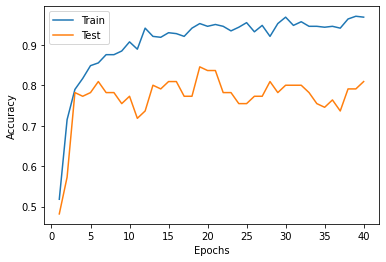

In [ ]:
# Accuracy Plot
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model2.history.history['accuracy'],  label='Train')
plt.plot(epochs_range, model2.history.history['val_accuracy'], label='Test')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()

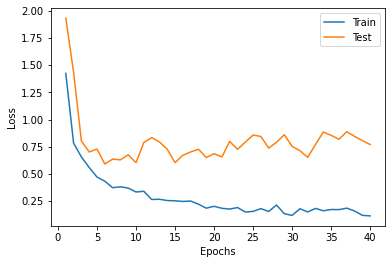

In [ ]:
# Loss Plot
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model2.history.history['loss'],  label='Train')
plt.plot(epochs_range, model2.history.history['val_loss'], label='Test')

plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend()


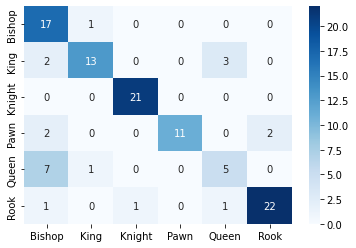

In [ ]:
# Confusion Matrix
y_pred = np.argmax(model2.predict(validation), axis=-1)

predictions = np.array([])
labels =  np.array([])
for x, y in validation:
    predictions = np.concatenate([predictions, np.argmax(model2.predict(x), axis=-1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

conf = tf.math.confusion_matrix(labels=labels, predictions=predictions)
sns.heatmap(conf, annot=True, cmap='Blues', yticklabels=class_names, xticklabels=class_names)

# resnet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50 
res = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
res.trainable = False 

In [ ]:
# Model Creation
input_shape = (image_size[0], image_size[1], 3)
reg = keras.regularizers.l2(0.01)

model3 = keras.Sequential()
model3.add(InputLayer(input_shape))
model3.add(aug)
model3.add(Rescaling(scale=1./255))#normalization
model3.add(res)
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(len(train.class_names), activation='softmax'))


model3.summary()


model3.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               12845184  
                                                                 
 batch_normalization_7 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                      

In [ ]:
epochs = 40
model3.fit(
    train,
    epochs=epochs,
    validation_data=validation
)

Epoch 1/40
28/28 [==============================] - 9s 170ms/step - loss: 2.0042 - accuracy: 0.1991 - val_loss: 11.7878 - val_accuracy: 0.1727
Epoch 2/40
28/28 [==============================] - 4s 137ms/step - loss: 1.7259 - accuracy: 0.2647 - val_loss: 7.2113 - val_accuracy: 0.2455
Epoch 3/40
28/28 [==============================] - 4s 139ms/step - loss: 1.7090 - accuracy: 0.3100 - val_loss: 7.4979 - val_accuracy: 0.1636
Epoch 4/40
28/28 [==============================] - 4s 138ms/step - loss: 1.6334 - accuracy: 0.3416 - val_loss: 3.7608 - val_accuracy: 0.2091
Epoch 5/40
28/28 [==============================] - 6s 202ms/step - loss: 1.5951 - accuracy: 0.3394 - val_loss: 2.4474 - val_accuracy: 0.2636
Epoch 6/40
28/28 [==============================] - 5s 141ms/step - loss: 1.6250 - accuracy: 0.3484 - val_loss: 2.0423 - val_accuracy: 0.2636
Epoch 7/40
28/28 [==============================] - 4s 139ms/step - loss: 1.5464 - accuracy: 0.3801 - val_loss: 1.8263 - val_accuracy: 0.3364
Epoch

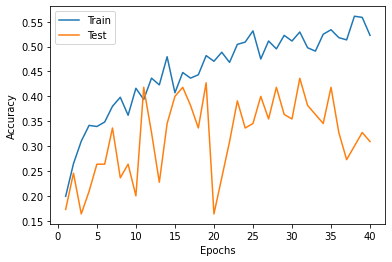

In [ ]:
# Accuracy Plot
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model3.history.history['accuracy'],  label='Train')
plt.plot(epochs_range, model3.history.history['val_accuracy'], label='Test')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()

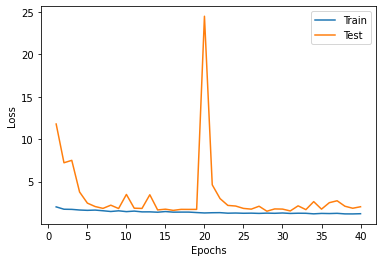

In [ ]:
# Loss Plot
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model3.history.history['loss'],  label='Train')
plt.plot(epochs_range, model3.history.history['val_loss'], label='Test')

plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend()

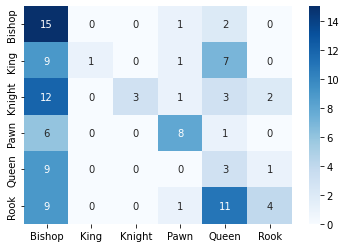

In [ ]:
# Confusion Matrix
y_pred = np.argmax(model3.predict(validation), axis=-1)

predictions = np.array([])
labels =  np.array([])
for x, y in validation:
    predictions = np.concatenate([predictions, np.argmax(model3.predict(x), axis=-1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

conf = tf.math.confusion_matrix(labels=labels, predictions=predictions)
sns.heatmap(conf, annot=True, cmap='Blues', yticklabels=class_names, xticklabels=class_names)

# MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNet 
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
mobilenet.trainable = False 

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
# Model Creation
model4 = Sequential()
model4.add(Rescaling(1./255 ,input_shape=(224,224,3)))
model4.add(data_augmentation)
model4.add(mobilenet)
model4.add(Flatten())
model4.add(Dense(128 , activation = 'relu'))
model4.add(Dense(len(class_names) , activation = 'softmax'))
model4.summary()

model4.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 128)               6422656   
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                      

In [ ]:
epochs = 40
model4.fit(
    train,
    epochs=epochs,
    validation_data=validation
);

Epoch 1/40
28/28 [==============================] - 22s 147ms/step - loss: 6.9254 - accuracy: 0.4751 - val_loss: 1.0076 - val_accuracy: 0.6818
Epoch 2/40
28/28 [==============================] - 4s 112ms/step - loss: 0.8910 - accuracy: 0.7308 - val_loss: 1.7837 - val_accuracy: 0.6636
Epoch 3/40
28/28 [==============================] - 4s 112ms/step - loss: 0.5419 - accuracy: 0.8484 - val_loss: 1.1291 - val_accuracy: 0.6727
Epoch 4/40
28/28 [==============================] - 4s 115ms/step - loss: 0.2799 - accuracy: 0.9095 - val_loss: 0.8344 - val_accuracy: 0.7818
Epoch 5/40
28/28 [==============================] - 4s 112ms/step - loss: 0.2335 - accuracy: 0.9208 - val_loss: 1.1175 - val_accuracy: 0.7636
Epoch 6/40
28/28 [==============================] - 4s 113ms/step - loss: 0.2974 - accuracy: 0.9208 - val_loss: 1.0272 - val_accuracy: 0.7818
Epoch 7/40
28/28 [==============================] - 4s 114ms/step - loss: 0.1781 - accuracy: 0.9457 - val_loss: 1.3846 - val_accuracy: 0.7545
Epoch

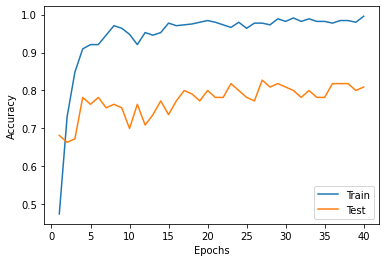

In [ ]:
# Accuracy Plot
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model4.history.history['accuracy'],  label='Train')
plt.plot(epochs_range, model4.history.history['val_accuracy'], label='Test')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()

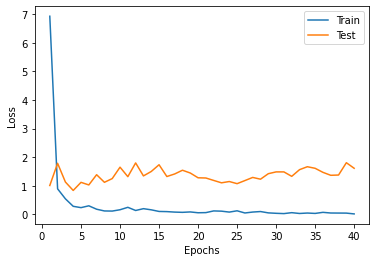

In [ ]:
# Loss Plot
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model4.history.history['loss'],  label='Train')
plt.plot(epochs_range, model4.history.history['val_loss'], label='Test')

plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend()

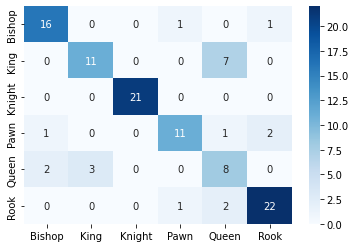

In [ ]:
# Confusion Matrix
y_pred = np.argmax(model4.predict(validation), axis=-1)

predictions = np.array([])
labels =  np.array([])
for x, y in validation:
    predictions = np.concatenate([predictions, np.argmax(model4.predict(x), axis=-1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

conf = tf.math.confusion_matrix(labels=labels, predictions=predictions)
sns.heatmap(conf, annot=True, cmap='Blues', yticklabels=class_names, xticklabels=class_names)